In [1]:
#First, we need to import all of the files to start working.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Here we are reading the prepared CSV file, and also setting the 'parse_dates' parameter 
#since we would like to have our dates column to be parsed.

df = pd.read_csv('job_search_dataset.csv', parse_dates=['Date'], dayfirst=True)
df.head()

,Date,Company,Position,Industry,Place,Rejection,Interview,Assignment,Offer
0,2021-01-22,Doctolib,Data Scientist,Software,Berlin,Yes,No,No,No
1,2021-01-22,Solarisbank,Working Student Data Analyst,Bank,Berlin,Yes,No,No,No
2,2021-01-22,Wayfair,Data Analyst,Marketplace,Berlin,Yes,No,No,No
3,2021-01-22,Auto1,Data Analyst,Automotive,Berlin,Yes,No,No,No
4,2021-01-23,Delivery Hero,Data Scientist,Delivery,Berlin,Yes,No,No,No


In [3]:
#Here we are checking out the types of data contained in each column.
#If there were any numeric (both int or float) columns, we needed to make sure it is correcly reflected here.
#Otherwise, we just need to convert the respective columns.

df.dtypes

Date          datetime64[ns]
Company               object
Position              object
Industry              object
Place                 object
Rejection             object
Interview             object
Assignment            object
Offer                 object
dtype: object

In [4]:
# Here we are checking whether any columns have missing values. Since the table has been generated by me very
# accurately, it does not have any missing values, but it real worlds it happens pretty frequently.
# If it happens, then it depends on the situation. If there are very little number of missing values,
# we can simply drop those columns. Otherwise, we can use different techniques. The easiest one would be setting all
# missing values to 0. That would work if there are not so many missing values, otherwise the dataset might get skewed.
# For instance, for numeric values, we can calculate mean or median (depending on the properties on that column)
# and put those calculated values instead of missing ones.

df.isnull().all()

Date          False
Company       False
Position      False
Industry      False
Place         False
Rejection     False
Interview     False
Assignment    False
Offer         False
dtype: bool

In [5]:
# Here we are adding a new column containing the day of the week for further useful analysis.

df['DayOfWeek'] = df['Date'].dt.day_name()
df.head()

,Date,Company,Position,Industry,Place,Rejection,Interview,Assignment,Offer,DayOfWeek
0,2021-01-22,Doctolib,Data Scientist,Software,Berlin,Yes,No,No,No,Friday
1,2021-01-22,Solarisbank,Working Student Data Analyst,Bank,Berlin,Yes,No,No,No,Friday
2,2021-01-22,Wayfair,Data Analyst,Marketplace,Berlin,Yes,No,No,No,Friday
3,2021-01-22,Auto1,Data Analyst,Automotive,Berlin,Yes,No,No,No,Friday
4,2021-01-23,Delivery Hero,Data Scientist,Delivery,Berlin,Yes,No,No,No,Saturday


In [6]:
# Here we are creating a new dataframe containing the information on the distribution of dates to see
# how many times I applied each day.

date_dist_df = df.groupby('Date')['Company'].count().to_frame()
date_dist_df.reset_index(inplace=True)
date_dist_df.head()

,Date,Company
0,2021-01-22,4
1,2021-01-23,2
2,2021-01-26,2
3,2021-01-28,14
4,2021-01-29,4


In [7]:
# Here we are creating a new dataframe containing the information on the distribution of days of the week to see
# how many times I applied each day of the week.
# I am also doing reindexing of the dataframe since it would be sorted based on alphabetical or numeric order,
# but not the days of the week as they are meant to be.

day_dist_df = df.groupby('DayOfWeek')['Company'].count().reindex(['Monday', 'Tuesday', 
                                                                  'Wednesday', 'Thursday', 'Friday',
                                                                 'Saturday', 'Sunday']).to_frame()
day_dist_df.reset_index(inplace=True)
day_dist_df

,DayOfWeek,Company
0,Monday,16
1,Tuesday,8
2,Wednesday,16
3,Thursday,27
4,Friday,21
5,Saturday,8
6,Sunday,2


In [8]:
# Here I am counting values for positions to see the distribution of positions I have applied so far.

positions_df = df['Position'].value_counts().to_frame()
positions_df.reset_index(inplace=True)

In [9]:
positions_df.columns = ['Position', 'Count']
positions_df.head()

,Position,Count
0,Data Scientist,26
1,Data Analyst,23
2,Junior Data Analyst,5
3,(Senior) Data Analyst,3
4,Senior Data Analyst,3


In [10]:
# Here I am counting values for industries of companies to see the distribution of industries I have applied so far.

industries_df = df['Industry'].value_counts().to_frame()
industries_df.reset_index(inplace=True)

In [11]:
industries_df.columns = ['Industry', 'Count']
industries_df.head()

,Industry,Count
0,Software,26
1,Automotive,10
2,Delivery,10
3,Marketplace,8
4,Bank,6


In [12]:
# Here I am calculating the rejection rate (how many of the companies have sent a rejection mail after I applied).

rejection_rate_df = df['Rejection'].value_counts().to_frame()
rejection_rate_df.reset_index(inplace=True)

In [13]:
# Here 'Yes' would mean that I got rejection, whereas 'No' - went for an interview.

rejection_rate_df.columns = ['Rejection', 'Count']
rejection_rate_df.head()

,Rejection,Count
0,Yes,92
1,No,6


In [14]:
#########################################################################################################################

# After all of the preparation and dataframe creation steps we are finally coming the interpretation part.
# Here we go!

#########################################################################################################################

In [15]:
# Hereby I am extracting current datetime to further include it to create appropriate filenames and etc.

from datetime import datetime

now = datetime.now()
current_time = now.strftime("%d.%m.%Y")

In [16]:
# The first interesting insight follows.

display('Until {time} I have applied for {job} vacant positions in {industry} industries'.format(time=current_time, 
                                                                                          job=len(df.index), 
                                                                                          industry=len(df.Industry.unique())))

'Until 04.03.2021 I have applied for 98 vacant positions in 22 industries'

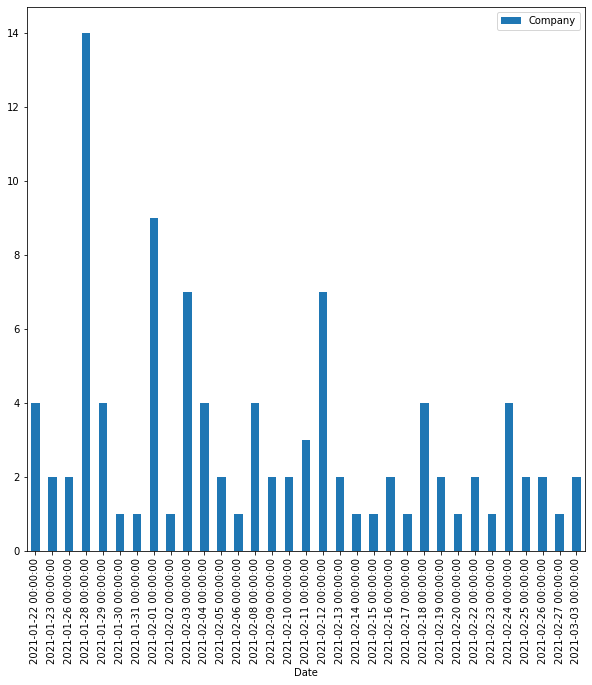

In [17]:
# Here I am plotting the amount of applications for each day to see the distribution.

date_dist_df.set_index('Date').plot.bar(figsize=(10,10))

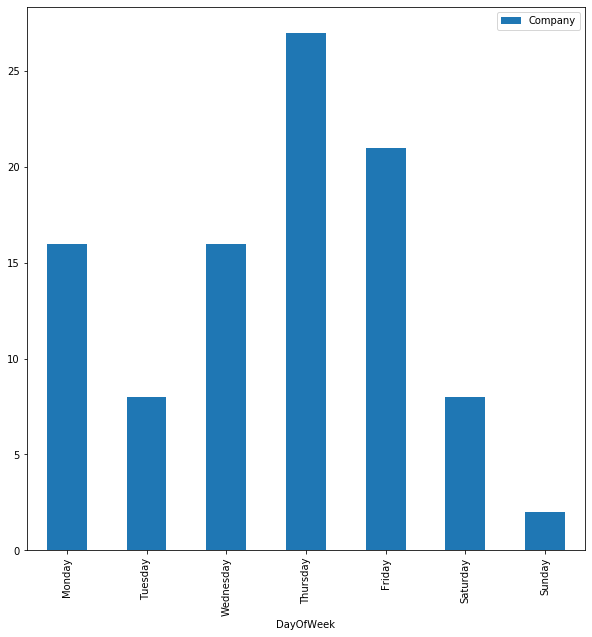

In [18]:
# Here I am plotting the amount of applications for each day of the week to see the distribution.

day_dist_df.set_index('DayOfWeek').plot.bar(figsize=(10,10))

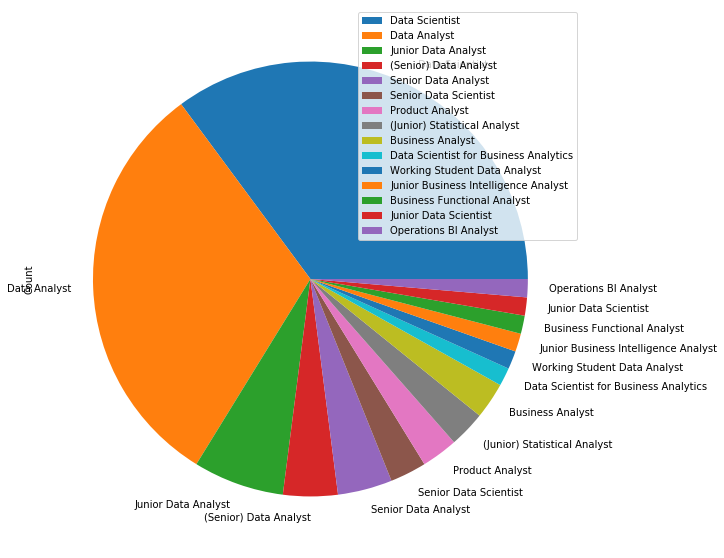

In [19]:
# Here I am plotting the pie chart to see the share of each position I applied for.
# Further I would be plotting the same thing using Bokeh and it would be interactive, 
# containing actual values and percentages.

positions_df.set_index('Position').head(15).plot.pie(y='Count', figsize=(10,10))

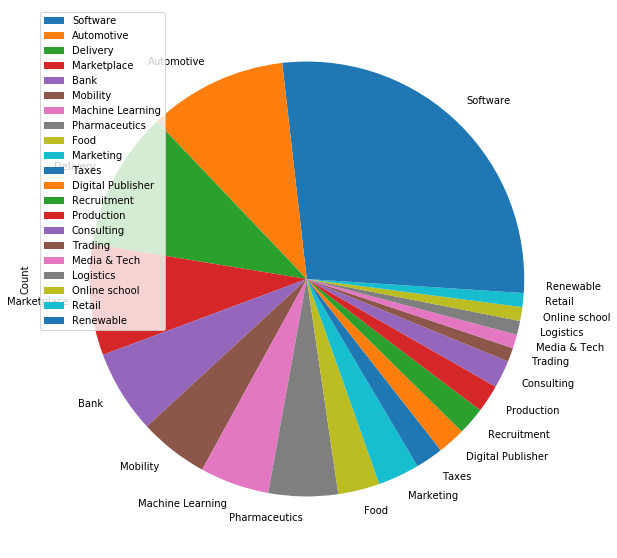

In [20]:
# Here I am plotting the pie chart to see the share of each industry of the company I applied for.
# Further I would be plotting the same thing using Bokeh and it would be interactive, 
# containing actual values and percentages.

industries_df.set_index('Industry').plot.pie(y='Count', figsize=(10,10))

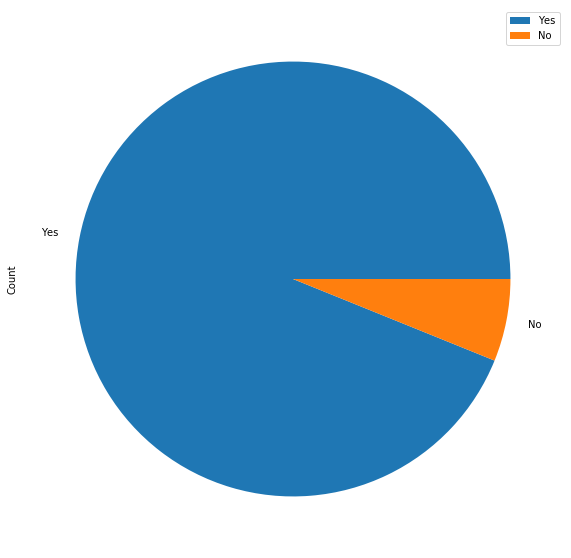

In [21]:
# Here I am plotting the pie chart to see the the rejection rate for the position I applied for.
# Further I would be plotting the same thing using Bokeh and it would be interactive, 
# containing actual values and percentages.

rejection_rate_df.set_index('Rejection').plot.pie(y='Count', figsize=(10,10))

In [22]:
# Here I am calculating the respective percentages, angles and also putting colors to pass everything to Bokeh.

from math import pi

from random import randint
color = []
n = 50
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

positions_b = positions_df.copy()
positions_b['Percentage'] = positions_b['Count'] / positions_b['Count'].sum()
positions_b['Angle'] = positions_b['Count'] / positions_b['Count'].sum() * 2*pi
positions_b['Color'] = color[:len(positions_b)]
positions_b.head()

,Position,Count,Percentage,Angle,Color
0,Data Scientist,26,0.265306,1.666968,#FBD748
1,Data Analyst,23,0.234694,1.474625,#EA0634
2,Junior Data Analyst,5,0.051020,0.320571,#F0A69E
3,(Senior) Data Analyst,3,0.030612,0.192342,#3F254A
4,Senior Data Analyst,3,0.030612,0.192342,#C56B77


In [23]:
# Here I am calculating the respective percentages, angles and also putting colors to pass everything to Bokeh.

industries_b = industries_df.copy()
industries_b['Percentage'] = industries_b['Count'] / industries_b['Count'].sum()
industries_b['Angle'] = industries_b['Count'] / industries_b['Count'].sum() * 2*pi
industries_b['Color'] = color[:len(industries_b)]
industries_b.head()

,Industry,Count,Percentage,Angle,Color
0,Software,26,0.268041,1.684153,#FBD748
1,Automotive,10,0.103093,0.647751,#EA0634
2,Delivery,10,0.103093,0.647751,#F0A69E
3,Marketplace,8,0.082474,0.518201,#3F254A
4,Bank,6,0.061856,0.388651,#C56B77


In [24]:
# Here I am calculating the respective percentages, angles and also putting colors to pass everything to Bokeh.

rejection_rate_b = rejection_rate_df.copy()
rejection_rate_b['Percentage'] = rejection_rate_b['Count'] / rejection_rate_b['Count'].sum()
rejection_rate_b['Angle'] = rejection_rate_b['Count'] / rejection_rate_b['Count'].sum() * 2*pi
rejection_rate_b['Color'] = color[:len(rejection_rate_b)]
rejection_rate_b.head()

,Rejection,Count,Percentage,Angle,Color
0,Yes,92,0.938776,5.898500,#FBD748
1,No,6,0.061224,0.384685,#EA0634


In [25]:
# Here I am plotting the Bokeh charts using the previously calculated dataframes containing values, percentages and angles.
# The respective HTML file containing the plot has to open and added to current repository.

from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.models import ColumnDataSource, FactorRange, HoverTool

output_file("positions_proportion.html")

b_positions = figure(plot_height=350, title="Proportion of positions I have applied until {}".format(current_time),
           tools=['hover', 'pan', 'wheel_zoom'], tooltips="@Percentage{%0.2f}: @Count - @Position", x_range=(-0.5, 1.0))

b_positions.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('Angle', include_zero=True), end_angle=cumsum('Angle'),
        line_color="white", fill_color='Color', legend_field='Position', source=positions_b)

b_positions.axis.axis_label=None
b_positions.axis.visible=False
b_positions.grid.grid_line_color = None
#b_positions.add_layout(b_positions.legend, 'right')
b_positions.legend.label_text_font_size = "8px"

show(b_positions)

In [26]:
# Here I am plotting the Bokeh charts using the previously calculated dataframes containing values, percentages and angles.
# The respective HTML file containing the plot has to open and added to current repository.

now = datetime.now()
current_time = now.strftime("%d.%m.%Y")

output_file("industries_proportion.html")

b_industries = figure(plot_height=350, title="Proportion of industries of companies I have applied until {}".format(current_time),
           tools=['hover', 'pan', 'wheel_zoom'], tooltips="@Percentage{%0.2f}: @Count - @Industry", x_range=(-0.5, 1.0))

b_industries.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('Angle', include_zero=True), end_angle=cumsum('Angle'),
        line_color="white", fill_color='Color', legend_field='Industry', source=industries_b)

b_industries.axis.axis_label=None
b_industries.axis.visible=False
b_industries.grid.grid_line_color = None
#b_positions.add_layout(b_positions.legend, 'right')
#b_positions.legend.label_text_font_size = "8px"

show(b_industries)

In [27]:
# Here I am plotting the Bokeh charts using the previously calculated dataframes containing values, percentages and angles.
# The respective HTML file containing the plot has to open and added to current repository.

now = datetime.now()
current_time = now.strftime("%d.%m.%Y")

output_file("rejection_rate_proportion.html")

b_rejection_rate = figure(plot_height=350, title="Rejection rate ('Yes' for rejection) for the positions I have applied until {}".format(current_time),
           tools=['hover', 'pan', 'wheel_zoom'], tooltips="@Percentage{%0.2f}: @Count - @Rejection", x_range=(-0.5, 1.0))

b_rejection_rate.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('Angle', include_zero=True), end_angle=cumsum('Angle'),
        line_color="white", fill_color='Color', legend_field='Rejection', source=rejection_rate_b)

b_rejection_rate.axis.axis_label=None
b_rejection_rate.axis.visible=False
b_rejection_rate.grid.grid_line_color = None
#b_positions.add_layout(b_positions.legend, 'right')
#b_positions.legend.label_text_font_size = "8px"

show(b_rejection_rate)